# 2D Filters

In [2]:
# Imports
import cv2
import numpy as np
from matplotlib import pyplot as plt

### 1- Image Correlation and Template Matching

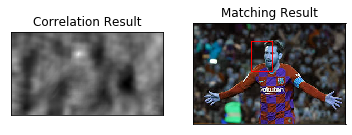

In [3]:
# Read image as color image
img= cv2.imread('../data/raw/img/03.jpeg', 1)

# Read template image
temp= cv2.imread('../data/raw/img/04.jpg', 1)
# Get template size
h,w= temp.shape[:2]

# Perform template matching using "Normalized Cross Correlation"
result= cv2.matchTemplate(img, temp, method=cv2.TM_CCORR_NORMED)
# Get mins and maxes
min_val, max_val, min_cor, max_cor= cv2.minMaxLoc(result)

# Select max point coordinates as top left corner of template position on image
top_left= max_cor
# Compute bottom right corner
bot_right= (top_left[0]+w, top_left[1]+h)
# Draw a recttangle on predicted template location on image
cv2.rectangle(img, top_left, bot_right, 255)

# Plotting
# Correlation result
plt.subplot(1,2,1)
plt.imshow(result, cmap='gray')
plt.title("Correlation Result")
plt.xticks([]),plt.yticks([])
# Image with rectangle
# Save image
cv2.imwrite('../reports/figures/2D_filters/template_matching.png', img)
plt.subplot(1,2,2)
plt.imshow(img)
plt.title('Matching Result')
plt.xticks([]),plt.yticks([])

plt.savefig('../reports/figures/2D_filters/template_matching_plot.png')


### 2- Image Smoothing and Image Filtering

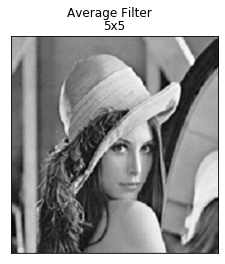

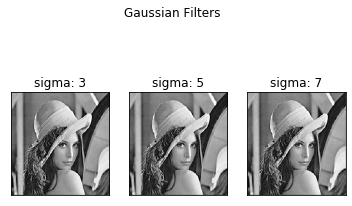

In [4]:
# Read Image
img= cv2.imread('../data/raw/img/01.png', 0)

# Filter dimension
filt_size= (5,5)

#======================================================================
# Average(Box) Filtering
smooth_img= cv2.boxFilter(img, -1, filt_size)

plt.plot()
plt.imshow(smooth_img, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title("{0}x{1}".format(*filt_size))
    
plt.suptitle('Average Filter')
plt.savefig('../reports/figures/2D_filters/average_filters.png')


#======================================================================
# Gaussian Filtering

sigma_list= [3, 5, 7]
plt.figure()

for idx,sigma in enumerate(sigma_list,0):
    
    gauss_smooth_img= cv2.GaussianBlur(img, filt_size, sigma)
    
    tag= "sigma: {0}".format(sigma)
    # Save image
    # cv2.imwrite('.../reports/figures/2D_filters/gaussian_' + tag + '.png', gauss_smooth_img)
    
    plt.subplot(1,3,(idx+1))
    plt.imshow(gauss_smooth_img, cmap='gray')
    plt.xticks([]),plt.yticks([])
    plt.title(tag)
    
plt.suptitle('Gaussian Filters')
plt.savefig('../reports/figures/2D_filters/gaussian_filters.png')

### 3- Image Noises and Image Sharpening

Text(0.5, 1.0, 'Image Sharpening')

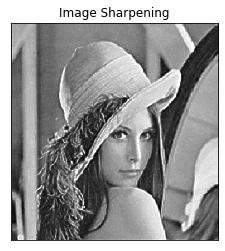

In [8]:
# Read Image as array of shape (NxD)
img= cv2.imread('../data/raw/img/01.png', 0)
N,D= img.shape

# Noise size- Number of noise pixels
noise_size= (N*D)//100   
# Noise indices
# Limit x axis indices to N
noise_x= np.random.randint(0,N,noise_size)
# Limit y axis indices to D
noise_y= np.random.randint(0,D,noise_size)

# Salt and Pepper Noise
def salt_and_pepper_noise(img, noise_x, noise_y, noise_size):
    """
    Adds salt and pepper noise to img.
    int noise_x, noise_y: image coordinates to add noise
    int noise_size: number of noise pixels
    """
    # White pixels
    img[noise_x[:noise_size//2], noise_y[:noise_size//2]]= 255
    # Black pixels
    img[noise_x[noise_size//2:], noise_y[noise_size//2:]]= 0

# Impulse Noise
def impulse_noise(img, noise_x, noise_y, noise_size):
    """
    Adds impulse noise to img.
    int noise_x, noise_y: image coordinates to add noise
    int noise_size: number of noise pixels

    """
    # White pixels
    img[noise_x, noise_y]= 255
    
# Gausian Noise
def gauss_noise(img, noise_x, noise_y, noise_size):
    """
    Adds gaussian noise to img.
    int noise_x, noise_y: image coordinates to add noise
    int noise_size: number of noise pixels
    """
    img_mean= np.mean(img)
    sigma= 10
    # Gaussian pixels
    gauss_pix= np.random.normal(img_mean,sigma,noise_size)
    img[noise_x, noise_y]= gauss_pix


# Noise list
noise_list= ['salt_and_pepper_noise', 'impulse_noise', 'gauss_noise']
# Filter size
filt_size= (7,7)

for idx,noise in enumerate(noise_list,0):
    # Make fresh image copy
    img_cpy= img.copy()
    # Add noise
    eval(noise)(img_cpy, noise_x, noise_y, noise_size)
    # Save image
    cv2.imwrite('../reports/figures/2D_noises_sharpening/'+noise+'.png', img_cpy)
    # Plot
    # plt.xticks([]), plt.yticks([])
    # plt.title(noise)
    # plt.imshow(img_cpy, cmap='gray') 
    
    # Smoothing
    # Average Filter
    img_filt= cv2.boxFilter(img_cpy, -1, filt_size)
    # Save image
    cv2.imwrite('../reports/figures/2D_noises_sharpening/'+noise+'_average.png', img_filt)
    # Gaussian Filter
    img_filt= cv2.GaussianBlur(img_cpy, filt_size, filt_size[0]/5)
    # Save image
    cv2.imwrite('../reports/figures/2D_noises_sharpening/'+noise+'_gaussian.png', img_filt)
    # Median Filter
    img_filt= cv2.medianBlur(img_cpy, filt_size[0])
    # Save image
    cv2.imwrite('../reports/figures/2D_noises_sharpening/'+noise+'_median.png', img_filt)
    
    
   
#======================================================================
# SHARPENING
# Blur the image
img_blur= cv2.GaussianBlur(img, filt_size, filt_size[0]/3)
# Extract details
# For some reason "img-img_blur" gives some funny results because of overflow into negative values
# Opencv subtract function uses the 'saturate:= max(min(round(num),0),255)' cast to keep values with the range (0,255)
# Residue
img_res= cv2.subtract(img, img_blur)
# Obtain sharpened image by applying High Boost (i.e. Scaling the residue by 2.5 then adding to the original image)
img_sharp= cv2.addWeighted(img, 1, img_res, 2.5, 0)

cv2.imwrite('.../reports/figures/2D_noises_sharpening/sharpened.png',img_sharp)
plt.imshow(img_sharp, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("Image Sharpening")


    

### 4- Fourier Transform and its applications

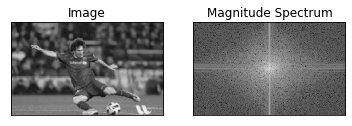

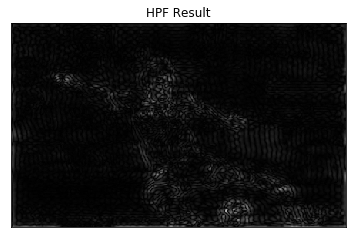

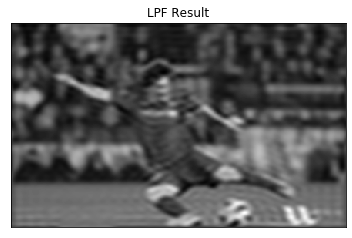

In [6]:
# Read image
img= cv2.imread('../data/raw/img/05.png', 0)

# Convert image to np.float32 and compute its FFT
dfft= cv2.dft(np.float32(img), flags= cv2.DFT_COMPLEX_OUTPUT)
# Shift the result to make it zero centred
dfft_centered= np.fft.fftshift(dfft)
# Compute the magnitude spectrum
mag_spec= 20*np.log(cv2.magnitude(dfft_centered[:,:,0], dfft_centered[:,:,1]))

# Plots
# Plot image
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Image')
plt.xticks([]), plt.yticks([])
# Plot Magnitude Spectrum
plt.subplot(1,2,2)
plt.imshow(mag_spec, cmap='gray')
plt.title('Magnitude Spectrum')
plt.xticks([]), plt.yticks([])
# Save plot
plt.savefig('../reports/figures/2D_FT/fourier_transform.png')


#======================================================================
# Applying High Pass Filter

# Make a copy of zero-centered FFT
hpf_dfft= dfft_centered.copy()
# Image center corrdinates
c_cords= [x//2 for x in img.shape]
# Mask 60x60
hpf_dfft[c_cords[0]-30:c_cords[0]+30, c_cords[1]-30:c_cords[1]+30]= 0
# Invert the FFT
# Revert zero centering
hpf_dfft= np.fft.ifftshift(hpf_dfft)
img_hpf= cv2.idft(hpf_dfft)
# Extract magnitude from complex numbers
img_hpf= cv2.magnitude(img_hpf[:,:,0], img_hpf[:,:,1])
# Plot
plt.figure()
plt.imshow(img_hpf, cmap='gray')
plt.title('HPF Result')
plt.xticks([]), plt.yticks([])
# Save plot
plt.savefig('../reports/figures/2D_FT/hpf_result_plot.png')


#======================================================================
# Applying Low Pass Filter

# Make a copy of zero-centered FFT
lpf_dfft= dfft_centered.copy()
# Create a mask the same size with FFT
lpf_mask= np.zeros(lpf_dfft.shape, dtype=np.uint8)
# Set 60x60 region to 1
lpf_mask[c_cords[0]-30:c_cords[0]+30, c_cords[1]-30:c_cords[1]+30]= 1
# Apply the mask
lpf_dfft= lpf_dfft*lpf_mask
# Reverse zero centrering
lpf_dfft= np.fft.ifftshift(lpf_dfft)
# Compute IFFT
img_lpf= cv2.idft(lpf_dfft)
# Obtain magnitude from complex numbers
img_lpf= cv2.magnitude(img_lpf[:,:,0], img_lpf[:,:,1])
# Plot
plt.figure()
plt.imshow(img_lpf, cmap='gray')
plt.title('LPF Result')
plt.xticks([]), plt.yticks([])
# Save plot
plt.savefig('../reports/figures/2D_FT/lpf_result_plot.png')


